<a href="https://colab.research.google.com/github/Shirav-001/Neural-Information-Processing-/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hodgkin-Huxley Neuron Simulation and f-I Curve Analysis

This project models the electrical behavior of a neuron using the Hodgkin-Huxley equations. We simulate spike generation under step current input and analyze firing rates across varying current levels to construct the neuron’s f-I curve.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
# Simulation parameters
T = 50 # ms total
dt = 0.01 # time step im ms
time = np.arange(0, T + dt, dt)

# Constants
C_m = 1.0 #µF/cm^2
g_Na = 50.0 #µF/cm^2
g_K = 10.0 #µF/cm^2
g_L = 0.1
E_Na = 50    # mV
E_K = -90
E_L = -65
#V_rest = -65.0  # initial voltage

# Injected current
I_ext = np.zeros_like(time)
I_ext[(time >= 10) & (time <= 20)] = 3.0 # µA/cm^2


In [36]:
# Define the gating variable functions
def alpha_m(V): return 0.32 * (V + 54) / (1 - np.exp(-(V + 54) / 4))
def beta_m(V): return 0.28 * (V + 27) / (np.exp((V + 27) / 5) -1)

def alpha_h(V): return 0.128 * np.exp(-(V + 50) / 18)
def beta_h(V): return 4 / (1 + np.exp(-(V + 27) / 5))

def alpha_n(V): return 0.032 * (V + 52) / (1 - np.exp(-(V + 52) / 5))
def beta_n(V): return 0.5 * np.exp(-(V + 57) / 40)



In [39]:
# Initial values
V = -65.0
m = alpha_m(V) / (alpha_m(V) + beta_m(V))
h = alpha_h(V) / (alpha_h(V) + beta_h(V))
n = alpha_n(V) / (alpha_n(V) + beta_n(V))


# Storage
V_trace = []
m_trace = []
h_trace = []
n_trace = []

In [40]:
# Simulation loop
for t in time:
    a_m, b_m = alpha_m(V), beta_m(V)
    a_h, b_h = alpha_h(V), beta_h(V)
    a_n, b_n = alpha_n(V), beta_n(V)

    tau_m = 1 / (a_m + b_m)
    m_inf = a_m / (a_m + b_m)
    tau_h = 1 / (a_h + b_h)
    h_inf = a_h / (a_h + b_h)
    tau_n = 1 / (a_n + b_n)
    n_inf = a_n / (a_n + b_n)

    m += dt * (m_inf - m) / tau_m
    h += dt * (h_inf - h) / tau_h
    n += dt * (n_inf - n) / tau_n

    I_Na = g_Na * m**3 * h * (V - E_Na)
    I_K = g_K * n**4 * (V - E_K)
    I_L = g_L * (V - E_L)

    dV = (I_ext[int(t / dt)] - I_Na - I_K - I_L) / C_m
    V += dt * dV

    V_trace.append(V)
    m_trace.append(m)
    h_trace.append(h)
    n_trace.append(n)


In [42]:
# Build and display DataFrame
import pandas as pd
df = pd.DataFrame({
    "time (ms)": time,
    "V (mV)": V_trace,
    "m": m_trace,
    "h": h_trace,
    "n": n_trace
})

print(df.head())  # shows the first few rows


   time (ms)     V (mV)         m         h         n
0       0.00 -64.999403  0.022083  0.993253  0.051821
1       0.01 -64.998806  0.022084  0.993253  0.051821
2       0.02 -64.998211  0.022084  0.993253  0.051821
3       0.03 -64.997615  0.022085  0.993252  0.051821
4       0.04 -64.997020  0.022086  0.993252  0.051821


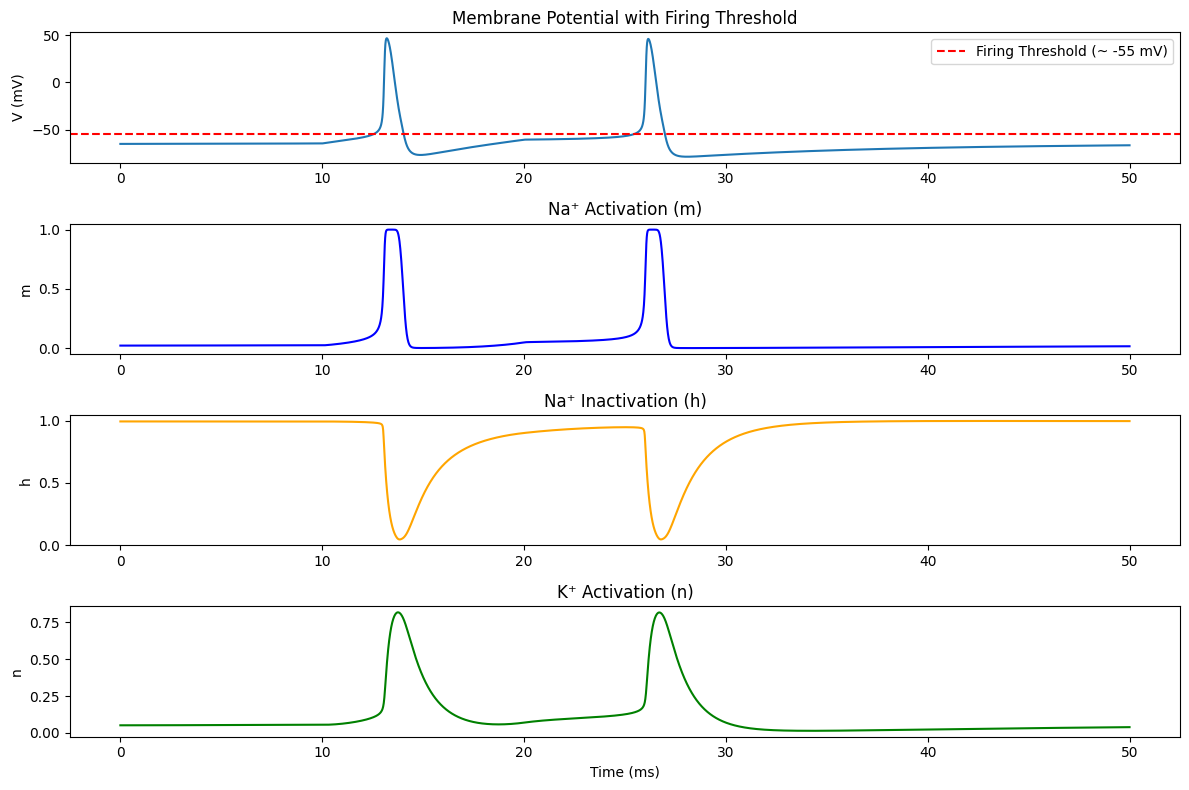

In [45]:
# Continue from simulation: plotting voltage trace and gating variables
plt.figure(figsize=(12, 8))

# Plot membrane potential
plt.subplot(4, 1, 1)
plt.plot(time, V_trace)
plt.axhline(-55, color='red', linestyle='--', label='Firing Threshold (~ -55 mV)')
plt.ylabel("V (mV)")
plt.title("Membrane Potential with Firing Threshold")
plt.legend()

# Plot m (Na+ activation)
plt.subplot(4, 1, 2)
plt.plot(time, m_trace, label='m', color='blue')
plt.ylabel("m")
plt.title("Na⁺ Activation (m)")

# Plot h (Na+ inactivation)
plt.subplot(4, 1, 3)
plt.plot(time, h_trace, label='h', color='orange')
plt.ylabel("h")
plt.title("Na⁺ Inactivation (h)")

# Plot n (K+ activation)
plt.subplot(4, 1, 4)
plt.plot(time, n_trace, label='n', color='green')
plt.ylabel("n")
plt.xlabel("Time (ms)")
plt.title("K⁺ Activation (n)")

plt.tight_layout()
plt.show()
